In [161]:
import os
import json
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "zuobiao.settings")
import django
django.setup()

from django.db.models import Avg, Count, Max, Q
from dashboard.models import Question, Anser, User
from dashboard.models import INCOME_CHOICES, EDU_CHOICES, ANSER_CHOICES, SEX_CHOICES

import pandas as pd
import datetime as dt
import plotly.plotly as py
from plotly.graph_objs import Bar, Scatter, Marker, Layout 

In [110]:
def get_display(choice_id, choice_set):
    return [v for k, v in choice_set if choice_id == k][0]

In [93]:
PK = 1
user_count = 170764
question = Question.objects.get(pk=PK)
ansers = question.anser_set
title = 'Question {}: {}'.format(PK, question.name)

In [169]:
data = ansers.values('choice').annotate(count=Count('choice')).order_by('choice')
x = [get_display(item['choice'], ANSER_CHOICES) for item in data]
y = [item['count'] for item in data]
py.iplot({
    'data': [Bar(x=x, y=y)],
    'layout': { 
            'title': title,
        },
    })

In [170]:
def get_user_data(field, choice_set):
    data = []
    for choice_id in [1, 2, 3, 4]:
        fieldname = 'user__{}'.format(field)
        queryset = ansers.filter(choice=choice_id).values(fieldname).annotate(count=Count(fieldname)).order_by('-count')
        x = [get_display(item[fieldname], choice_set) for item in queryset]
        y = [item['count'] / user_count * 100 for item in queryset]
        data.append({'x': x, 'y': y, 'type': 'bar', 'name': get_display(choice_id, ANSER_CHOICES)})   
    return data
data = get_user_data('sex', SEX_CHOICES)
py.iplot({
'data': data,
'layout': {
        'barmode': 'stack',
        'title': title
    }
})

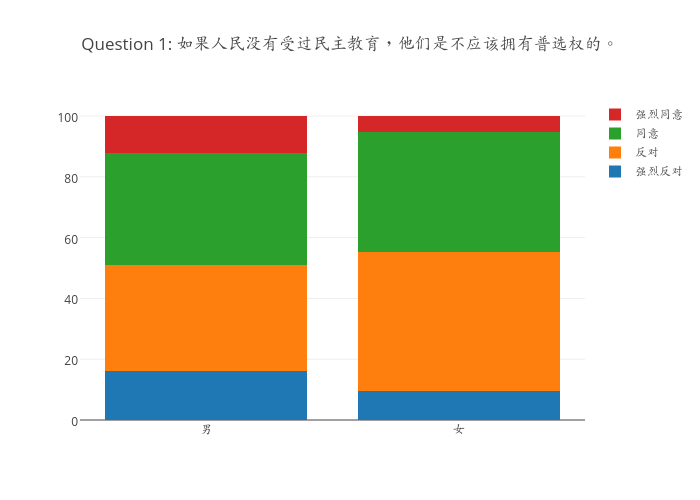

In [155]:
def get_user_data_banlance(field, choice_set):
    data = []
    choices = [k for k, v in choice_set]
    for choice_id in [1, 2, 3, 4]:
        x = [k for k, v in choice_set]
        y = [0] * len(choice_set)
        fieldname = 'user__{}'.format(field)
        queryset = ansers.filter(choice=choice_id).values(fieldname).annotate(count=Count(fieldname)).order_by('-count')
        for item in queryset:
            for i, choice in enumerate(choices):
                if item[fieldname] == choice:
                    x[i] = get_display(item[fieldname], choice_set)
                    y[i] = item['count']
        data.append({'x': x, 'y': y, 'type': 'bar', 'name': get_display(choice_id, ANSER_CHOICES)})   
    sums = [sum(t) for t in zip(*[item['y'] for item in data])]
    for item in data:
        item['y'] = [y / (sums[i] or 1) * 100 for i, y in enumerate(item['y'])]
    return data
data = get_user_data_banlance('sex', SEX_CHOICES)
py.iplot({
'data': data,
'layout': {
        'barmode': 'stack',
        'title': title
    }
})

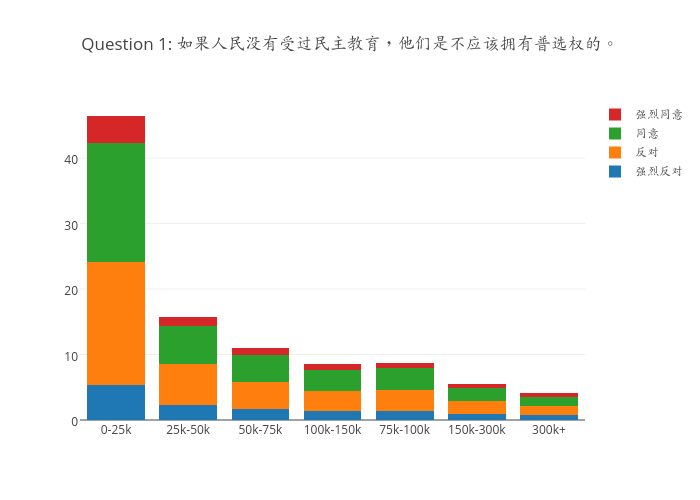

In [157]:
data = get_user_data('income', INCOME_CHOICES)
py.iplot({
'data': data,
'layout': {
        'barmode': 'stack',
        'title': title
    }
})

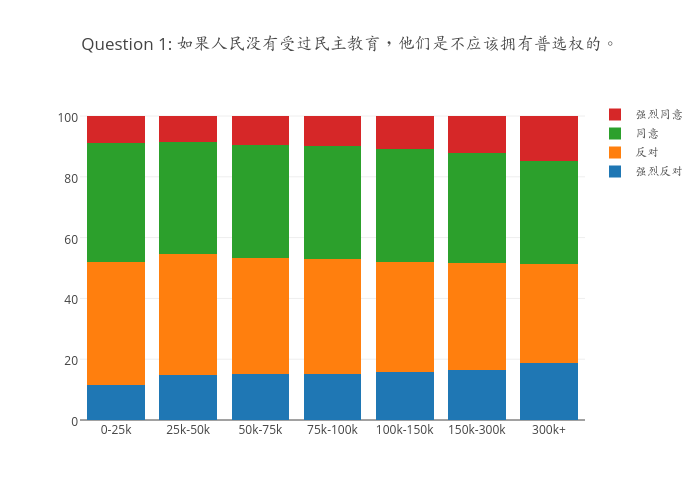

In [145]:
data = get_user_data_banlance('income', INCOME_CHOICES)
py.iplot({
'data': data,
'layout': {
        'barmode': 'stack',
        'title': title
    }
})

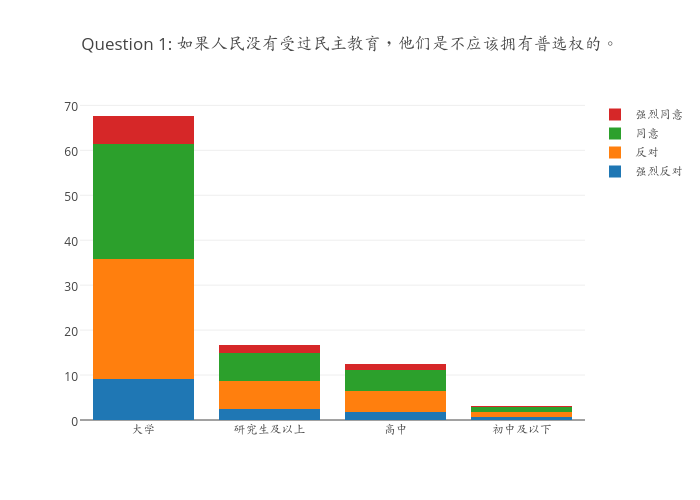

In [158]:
data = get_user_data('education', EDU_CHOICES)
py.iplot({
'data': data,
'layout': {
        'barmode': 'stack',
        'title': title
    }
})

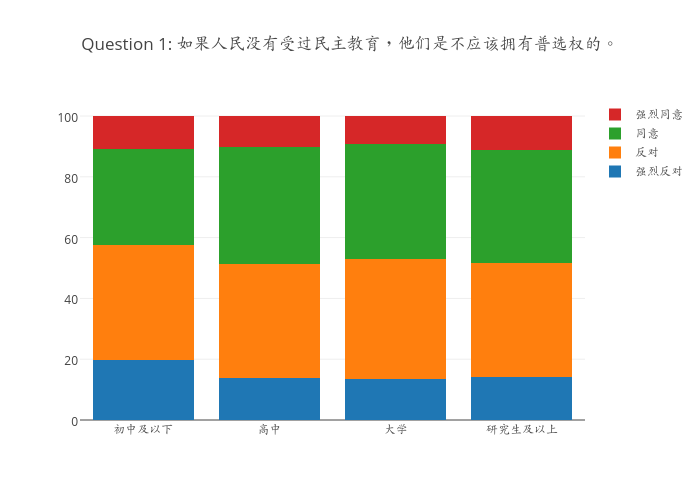

In [159]:
data = get_user_data_banlance('education', EDU_CHOICES)
py.iplot({
'data': data,
'layout': {
        'barmode': 'stack',
        'title': title
    }
})

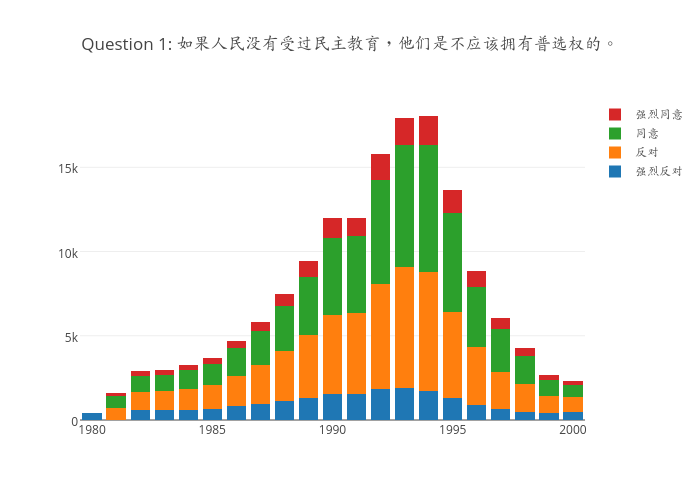

In [160]:
data = []
for choice_id in [1, 2, 3, 4]:
    field = 'birthday'
    fieldname = 'user__{}'.format(field)
    queryset = ansers.filter(choice=choice_id).values(fieldname).annotate(count=Count(fieldname)).order_by('-count')[:20]
    x = [item[fieldname] for item in queryset]
    y = [item['count'] for item in queryset]
    data.append({'x': x, 'y': y, 'type': 'bar', 'name': get_display(choice_id, ANSER_CHOICES)})   
    
py.iplot({
'data': data,
'layout': {
        'barmode': 'stack',
        'title': title
    }
})

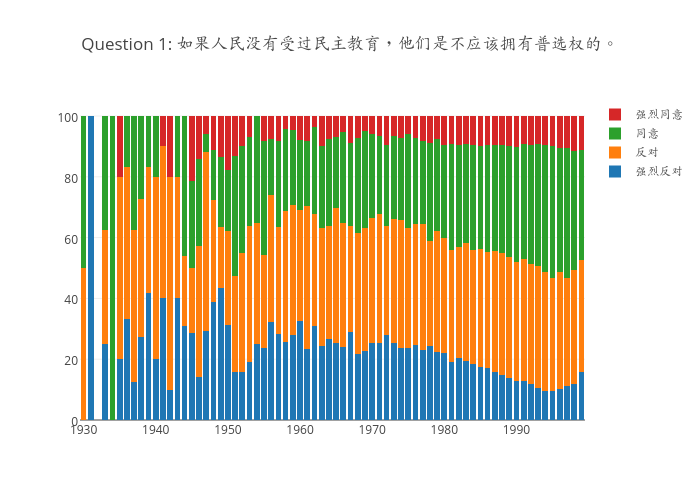

In [146]:
data = []
years = range(1930, 2000)
for choice_id in [1, 2, 3, 4]:
    field = 'birthday'
    x, y = list(range(1930, 2000)), [0] * 70 
    fieldname = 'user__{}'.format(field)
    queryset = ansers.filter(choice=choice_id).values(fieldname).annotate(count=Count(fieldname)).order_by('-count')
    for item in queryset:
        for i, year in enumerate(years):
            if item[fieldname] == year:
                x[i] = item[fieldname]
                y[i] = item['count']
    data.append({'x': x, 'y': y, 'type': 'bar', 'name': get_display(choice_id, ANSER_CHOICES)})   

sums = [sum(t) for t in zip(*[item['y'] for item in data])]
for item in data:
    item['y'] = [y / (sums[i] or 1) * 100 for i, y in enumerate(item['y'])]

py.iplot({
'data': data,
'layout': {
        'barmode': 'stack',
        'title': title,
    }
})


In [171]:
%%html
<style>a {text-decoration: none!important}</style>

# Index

1. [如果人民没有受过民主教育，他们是不应该拥有普选权的。](anser1.html)
1. [人权高于主权。](anser2.html)
1. [发生重大社会安全事件时，即使认为信息公开会导致骚乱的风险，政府仍应该开放信息传播。](anser3.html)
1. [西方的多党制不适合中国国情。](anser4.html)
1. [在中国照搬西方式的言论自由会导致社会失序。](anser5.html)
1. [由高校自主考试招生比全国统一考试招生更好。](anser6.html)
1. [应该容许宗教人士在非宗教场所公开传教。](anser7.html)
1. [无论中小学生或大学生，都应参加由国家统一安排的军训。](anser8.html)
1. [国家的统一和领土完整是社会的最高利益。](anser9.html)
1. [哪怕经历了违反程序规定的审讯和取证过程，确实有罪的罪犯也应被处刑。](anser10.html)
1. [国家有义务进行对外援助。](anser11.html)
1. [国家领导人及开国领袖的形象可以作为文艺作品的丑化对象。](anser12.html)
1. [当法律未能充分制止罪恶行为时，人民群众有权自发对罪恶行为进行制裁。](anser13.html)
1. [应当允许媒体代表某一特定阶层或利益集团发言。](anser14.html)
1. [如果国家综合实力许可，那么中国有权为了维护自己的利益而采取任何行动。](anser15.html)
1. [条件允许的话应该武力统一台湾。](anser16.html)
1. [律师即使明知被辩护人的犯罪事实也应当尽力为其进行辩护。](anser17.html)
1. [应该允许中国公民同时具有外国国籍。](anser18.html)
1. [以美国为首的西方国家不可能真正容许中国崛起成为一流强国。](anser19.html)
1. [国家应当采取措施培养和支持体育健儿在各种国际比赛场合为国争光。](anser20.html)
1. [最低工资应由国家规定。](anser21.html)
1. [中国改革开放以来的经济发展的成果都被一小群人占有了，大多数人没得到什么好处。](anser22.html)
1. [在重大工程项目的决策中，个人利益应该为社会利益让路。](anser23.html)
1. [浪费粮食也是个人的自由。](anser24.html)
1. [如果猪肉价格过高，政府应当干预。](anser25.html)
1. [应当对国外同类产品征收高额关税来保护国内民族工业。](anser26.html)
1. [教育应当尽可能公立。](anser27.html)
1. [国有企业的利益属于国家利益。](anser28.html)
1. [试图控制房地产价格的行为会破坏经济发展。](anser29.html)
1. [改善低收入者生活的首要手段是国家给予财政补贴和扶持。](anser30.html)
1. [有钱人理应获得更好的医疗服务。](anser31.html)
1. [高收入者应该公开自己的经济来源。](anser32.html)
1. [靠运作资金赚钱的人对社会的贡献比不上靠劳动赚钱的人。](anser33.html)
1. [与其让国有企业亏损破产，不如转卖给资本家。](anser34.html)
1. [那些关系到国家安全、以及其他重要国计民生的领域，必须全部由国有企业掌控。](anser35.html)
1. [资本积累的过程总是伴随着对普通劳动人民利益的伤害。](anser36.html)
1. [私人应当可以拥有和买卖土地。](anser37.html)
1. [政府应当采用较高的粮食收购价格以增加农民收入。](anser38.html)
1. [在华外国资本应享受和民族资本同样的待遇。](anser39.html)
1. [市场竞争中自然形成的垄断地位是无害的。](anser40.html)
1. [两个成年人之间自愿的性行为是其自由，无论其婚姻关系为何。](anser41.html)
1. [不应公开谈论自己长辈的缺点。](anser42.html)
1. [现代中国社会需要儒家思想。](anser43.html)
1. [判断艺术作品的价值的根本标准是看是不是受到人民大众喜爱。](anser44.html)
1. [即使有人口压力，国家和社会也无权干涉个人要不要孩子，要几个孩子。](anser45.html)
1. [周易八卦能够有效的解释很多事情。](anser46.html)
1. [中国传统医学对人体健康的观念比现代主流医学更高明。](anser47.html)
1. [汉字无需人为推行简化。](anser48.html)
1. [应当将中国传统文化的经典作品作为儿童基础教育读物。](anser49.html)
1. [如果是出于自愿，我会认可我的孩子和同性结成伴侣关系。](anser50.html)